# Data Manipulation and Analysis Frameworks

**NumPy** is a Python library that helps users work with large, multi-dimensional arrays and matrices. It also offers a large collection of high-level mathematical functions that can operate on this array representation.

The Python Data Analysis Library (also known as **pandas**) is a versatile tool for manipulating and analyzing data sets. It also support the assembly of plots using matplotlib, and integrates well with other libraries that work with NumPy arrays.

In pandas, data is organzied into **data frames**. A data frame is a data structure that stores data sets in a tabular format. In this tabular format, each row and column is given a label.

Pandas DataFrames are documented at http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html.

## Dependencies

In [1]:
import pandas as pd
#don't forget to always enter your virtualenv environment and to rerun pip install -r requirements.txt to get the latest deps
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import datetime

%matplotlib inline

## Fetching, storing, and retrieving data sets

For demonstration purposes, we'll use a library already included within pandas that fetches data from standard online sources, such as Yahoo! Finance. More information on what types of data you can fetch is at https://github.com/pydata/pandas-datareader/blob/master/docs/source/remote_data.rst.

In [2]:
stocks = 'YELP'
data_source = 'robinhood'
rh_stocks = web.DataReader(stocks, data_source)

In [3]:
rh_stocks.head()

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
YELP   2017-09-14   42.910000  43.030000         False  42.520000  42.750000   
       2017-09-15   43.570000  43.700000         False  42.760000  42.910000   
       2017-09-18   43.500000  44.230000         False  43.350000  43.800000   
       2017-09-19   43.850000  44.070000         False  43.040100  43.500000   
       2017-09-20   44.170000  44.240000         False  43.440000  43.780000   

                  session   volume  
symbol begins_at                    
YELP   2017-09-14     reg  1190931  
       2017-09-15     reg  4243413  
       2017-09-18     reg  1261139  
       2017-09-19     reg   859142  
       2017-09-20     reg   940095

In [4]:
type(rh_stocks)

pandas.core.frame.DataFrame

In [5]:
rh_stocks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 252 entries, (YELP, 2017-09-14 00:00:00) to (YELP, 2018-09-13 00:00:00)
Data columns (total 7 columns):
close_price     252 non-null object
high_price      252 non-null object
interpolated    252 non-null bool
low_price       252 non-null object
open_price      252 non-null object
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), int64(1), object(5)
memory usage: 9.9+ KB


### Reading data from a comma-separated values (CSV) file

In [6]:
rh_stocks.to_csv('rh_data.csv')
print(open('rh_data.csv').read())

symbol,begins_at,close_price,high_price,interpolated,low_price,open_price,session,volume
YELP,2017-09-14,42.910000,43.030000,False,42.520000,42.750000,reg,1190931
YELP,2017-09-15,43.570000,43.700000,False,42.760000,42.910000,reg,4243413
YELP,2017-09-18,43.500000,44.230000,False,43.350000,43.800000,reg,1261139
YELP,2017-09-19,43.850000,44.070000,False,43.040100,43.500000,reg,859142
YELP,2017-09-20,44.170000,44.240000,False,43.440000,43.780000,reg,940095
YELP,2017-09-21,43.610000,44.070000,False,43.050000,44.070000,reg,769355
YELP,2017-09-22,43.420000,44.000000,False,43.240000,43.690000,reg,1056873
YELP,2017-09-25,41.900000,43.129900,False,41.320000,43.030000,reg,2026892
YELP,2017-09-26,41.720000,42.421500,False,41.680000,42.110000,reg,1087678
YELP,2017-09-27,42.700000,42.790000,False,41.800000,42.090000,reg,1471632
YELP,2017-09-28,42.660000,42.890000,False,42.300000,42.380000,reg,1622303
YELP,2017-09-29,43.300000,43.420000,False,42.590000,42.620000,reg,898853
YELP,2017-10-02,44.090000,4

In [7]:
df = pd.read_csv('rh_data.csv')
df

,symbol,begins_at,close_price,high_price,interpolated,low_price,open_price,session,volume
0,YELP,2017-09-14,42.91,43.0300,False,42.5200,42.750,reg,1190931
1,YELP,2017-09-15,43.57,43.7000,False,42.7600,42.910,reg,4243413
2,YELP,2017-09-18,43.50,44.2300,False,43.3500,43.800,reg,1261139
3,YELP,2017-09-19,43.85,44.0700,False,43.0401,43.500,reg,859142
4,YELP,2017-09-20,44.17,44.2400,False,43.4400,43.780,reg,940095
5,YELP,2017-09-21,43.61,44.0700,False,43.0500,44.070,reg,769355
6,YELP,2017-09-22,43.42,44.0000,False,43.2400,43.690,reg,1056873
7,YELP,2017-09-25,41.90,43.1299,False,41.3200,43.030,reg,2026892
8,YELP,2017-09-26,41.72,42.4215,False,41.6800,42.110,reg,1087678
9,YELP,2017-09-27,42.70,42.7900,False,41.8000,42.090,reg,1471632


The number of rows in the DataFrame can be obtained in the following way.

In [8]:
len(df)

252

## Working with data columns in a DataFrame

Columns correspond to attributes (also known as features or feature dimensions).

In [9]:
df.columns

Index(['symbol', 'begins_at', 'close_price', 'high_price', 'interpolated',
       'low_price', 'open_price', 'session', 'volume'],
      dtype='object')

In [10]:
type(df.columns)

pandas.core.indexes.base.Index

A single column can be selected using the indexing/slicing syntax.

In [11]:
print(df.keys())
df['open_price']

Index(['symbol', 'begins_at', 'close_price', 'high_price', 'interpolated',
       'low_price', 'open_price', 'session', 'volume'],
      dtype='object')


0      42.750
1      42.910
2      43.800
3      43.500
4      43.780
5      44.070
6      43.690
7      43.030
8      42.110
9      42.090
10     42.380
11     42.620
12     43.800
13     44.210
14     45.630
15     46.050
16     46.100
17     45.280
18     45.550
19     43.930
20     43.920
21     43.730
22     43.910
23     43.360
24     43.860
25     44.160
26     44.960
27     44.520
28     43.920
29     43.690
        ...  
222    37.270
223    37.930
224    38.000
225    38.770
226    38.900
227    44.000
228    48.030
229    49.560
230    47.010
231    47.490
232    47.340
233    46.050
234    45.240
235    44.680
236    44.225
237    44.275
238    45.610
239    46.690
240    47.000
241    46.560
242    46.930
243    46.680
244    46.890
245    46.590
246    45.000
247    44.590
248    45.440
249    45.020
250    45.130
251    46.000
Name: open_price, Length: 252, dtype: float64

### Types in pandas

Data frames are their own type. The columns of a data frame are ```Series``` objects (in many ways similar to a list).

In [12]:
type(df['open_price'])

pandas.core.series.Series

There are other ways of selecting columns within a data frame.

In [13]:
df.open_price

0      42.750
1      42.910
2      43.800
3      43.500
4      43.780
5      44.070
6      43.690
7      43.030
8      42.110
9      42.090
10     42.380
11     42.620
12     43.800
13     44.210
14     45.630
15     46.050
16     46.100
17     45.280
18     45.550
19     43.930
20     43.920
21     43.730
22     43.910
23     43.360
24     43.860
25     44.160
26     44.960
27     44.520
28     43.920
29     43.690
        ...  
222    37.270
223    37.930
224    38.000
225    38.770
226    38.900
227    44.000
228    48.030
229    49.560
230    47.010
231    47.490
232    47.340
233    46.050
234    45.240
235    44.680
236    44.225
237    44.275
238    45.610
239    46.690
240    47.000
241    46.560
242    46.930
243    46.680
244    46.890
245    46.590
246    45.000
247    44.590
248    45.440
249    45.020
250    45.130
251    46.000
Name: open_price, Length: 252, dtype: float64

In [14]:
df[['open_price','close_price']].head()

,open_price,close_price
0,42.75,42.91
1,42.91,43.57
2,43.80,43.50
3,43.50,43.85
4,43.78,44.17


In [15]:
df.begins_at.head(10)

0    2017-09-14
1    2017-09-15
2    2017-09-18
3    2017-09-19
4    2017-09-20
5    2017-09-21
6    2017-09-22
7    2017-09-25
8    2017-09-26
9    2017-09-27
Name: begins_at, dtype: object

In [16]:
df.begins_at.tail(10)

242    2018-08-30
243    2018-08-31
244    2018-09-04
245    2018-09-05
246    2018-09-06
247    2018-09-07
248    2018-09-10
249    2018-09-11
250    2018-09-12
251    2018-09-13
Name: begins_at, dtype: object

If a column name happens to have whitespace in it, the indexing/slicing notation can be used (e.g., `df['Example Column']`).

Column names can be changed.

In [17]:
new_column_names = [x.lower().replace('_','-') for x in df.columns]
df.columns = new_column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
symbol          252 non-null object
begins-at       252 non-null object
close-price     252 non-null float64
high-price      252 non-null float64
interpolated    252 non-null bool
low-price       252 non-null float64
open-price      252 non-null float64
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 13.1+ KB


This can be useful as a way to normalize column names (e.g., removing whitespace).

## DataFrame methods

A DataFrame object has a variety of useful methods.

In [18]:
df.mean()

close-price     4.346040e+01
high-price      4.409152e+01
interpolated    0.000000e+00
low-price       4.281115e+01
open-price      4.343585e+01
volume          1.611763e+06
dtype: float64

Notice that ```mean``` automatically ignores columns that would not lead to a meaningful result (such as the date information).

In [19]:
df.std()

close-price     2.478196e+00
high-price      2.478939e+00
interpolated    0.000000e+00
low-price       2.455963e+00
open-price      2.457315e+00
volume          1.991210e+06
dtype: float64

In [20]:
df.median()

close-price          43.655
high-price           44.235
interpolated          0.000
low-price            43.210
open-price           43.800
volume          1222815.000
dtype: float64

In [21]:
df['open-price'].mean()

43.435853174603174

## Using plotting methods with a DataFrame

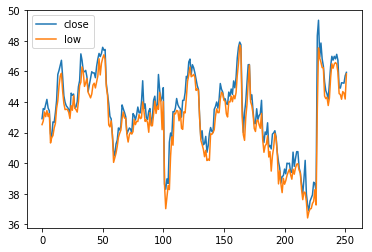

In [22]:
df['close-price'].plot(label='close')
df['low-price'].plot(label='low')
plt.legend(loc='best')

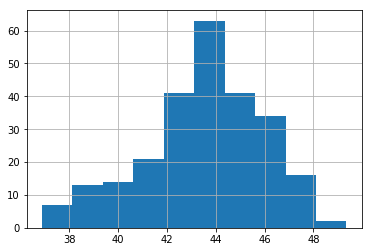

In [23]:
df['close-price'].hist()

## Bulk operations over data in a DataFrame

Methods like `sum()` and `std()` work on entire columns. We can also run our own functions across all values in a column (or row) using `.apply()`.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
symbol          252 non-null object
begins-at       252 non-null object
close-price     252 non-null float64
high-price      252 non-null float64
interpolated    252 non-null bool
low-price       252 non-null float64
open-price      252 non-null float64
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 13.1+ KB


In [25]:
rh_stocks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 252 entries, (YELP, 2017-09-14 00:00:00) to (YELP, 2018-09-13 00:00:00)
Data columns (total 7 columns):
close_price     252 non-null object
high_price      252 non-null object
interpolated    252 non-null bool
low_price       252 non-null object
open_price      252 non-null object
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), int64(1), object(5)
memory usage: 9.9+ KB


In [26]:
df['begins-at'].head()

0    2017-09-14
1    2017-09-15
2    2017-09-18
3    2017-09-19
4    2017-09-20
Name: begins-at, dtype: object

In [27]:
type(df['begins-at'][1])

str

The `values` property of the column returns a list of values for the column. Inspecting the first value reveals that these are strings with a particular format.

In [28]:
first_date = df['begins-at'].values[0]
first_date

'2017-09-14'

In [29]:
datetime.strptime(str(first_date).split("T")[0], "%Y-%m-%d")

datetime.datetime(2017, 9, 14, 0, 0)

In [30]:
transform = lambda d: str(d).split("T")[0].split(" ")[0]
df['begins-at'] = df['begins-at'].apply(transform)
df['begins-at'].head()

0    2017-09-14
1    2017-09-15
2    2017-09-18
3    2017-09-19
4    2017-09-20
Name: begins-at, dtype: object

Each row in a DataFrame is associated with an index, which is a label that uniquely identifies that row. The row indices so far have been auto-generated by pandas, and are simply integers starting from 0.

Instead, we can use dates instead of integers for indices. Overwriting the index is as easy as assigning to the `index` property of the DataFrame.

In [31]:
df.index = df['begins-at']
df.head()

,symbol,begins-at,close-price,high-price,interpolated,low-price,open-price,session,volume
begins-at,,,,,,,,,
2017-09-14,YELP,2017-09-14,42.91,43.03,False,42.5200,42.75,reg,1190931
2017-09-15,YELP,2017-09-15,43.57,43.70,False,42.7600,42.91,reg,4243413
2017-09-18,YELP,2017-09-18,43.50,44.23,False,43.3500,43.80,reg,1261139
2017-09-19,YELP,2017-09-19,43.85,44.07,False,43.0401,43.50,reg,859142
2017-09-20,YELP,2017-09-20,44.17,44.24,False,43.4400,43.78,reg,940095


Now that we have made an index based on date, we can drop the original `begins-at` column.

In [32]:
df = df.drop(['begins-at'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-09-14 to 2018-09-13
Data columns (total 8 columns):
symbol          252 non-null object
close-price     252 non-null float64
high-price      252 non-null float64
interpolated    252 non-null bool
low-price       252 non-null float64
open-price      252 non-null float64
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 13.0+ KB


Now if we extract a column, it will also be indexed by date.

In [33]:
df['open-price'].tail()

begins-at
2018-09-07    44.59
2018-09-10    45.44
2018-09-11    45.02
2018-09-12    45.13
2018-09-13    46.00
Name: open-price, dtype: float64

## Accessing rows within a DataFrame

We have seen how to access a column of the DataFrame. To access a row, we need to use a different syntax.

For example, To access a row by its index value, use the `.loc()` method.

In [35]:
df.loc['2018-09-12']

symbol            YELP
close-price      45.72
high-price       45.86
interpolated     False
low-price       44.195
open-price       45.13
session            reg
volume          875412
Name: 2018-09-12, dtype: object

To access a row by its sequence number (i.e., like an array index), use `.iloc()` (which stands for "integer location").

To iterate over the rows, use `.iterrows()`.

In [ ]:
num_positive_days = 0
for (idx, row) in df.iterrows():
    if row['close-price'] > row['open-price']:
        num_positive_days += 1
        
print("The total number of positive-gain days is {}.".format(num_positive_days))